In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
try:
    df_police = pd.read_csv('police_project.csv')  # Assuming your file is named 'police_stop.csv'
    print("Police Stop dataset loaded successfully!")
except FileNotFoundError:
    print("Error: police_project.csv not found. Please make sure the file is in the correct directory.")
    exit()

# Display the first few rows to get a feel for the data
print("\nFirst 5 rows of the Police Project dataset:")
print(df_police.head())
print("\nDataset information:")
print(df_police.info())


Police Stop dataset loaded successfully!

First 5 rows of the Police Project dataset:
    stop_date stop_time  county_name driver_gender  driver_age_raw  \
0  2005-01-02      1:55          NaN             M          1985.0   
1  2005-01-18      8:15          NaN             M          1965.0   
2  2005-01-23     23:15          NaN             M          1972.0   
3  2005-02-20     17:15          NaN             M          1986.0   
4  2005-03-14     10:00          NaN             F          1984.0   

   driver_age driver_race     violation_raw violation  search_conducted  \
0        20.0       White          Speeding  Speeding             False   
1        40.0       White          Speeding  Speeding             False   
2        33.0       White          Speeding  Speeding             False   
3        19.0       White  Call for Service     Other             False   
4        21.0       White          Speeding  Speeding             False   

  search_type   stop_outcome is_arrested s

In [4]:
print("\nSummary statistics for numeric features:")
print(df_police.describe())

# Identify numeric features for visualization
numeric_features_police = df_police.select_dtypes(include=np.number).columns


Summary statistics for numeric features:
       county_name  driver_age_raw    driver_age
count          0.0    86414.000000  86120.000000
mean           NaN     1970.491228     34.011333
std            NaN      110.914909     12.738564
min            NaN        0.000000     15.000000
25%            NaN     1967.000000     23.000000
50%            NaN     1980.000000     31.000000
75%            NaN     1987.000000     43.000000
max            NaN     8801.000000     99.000000


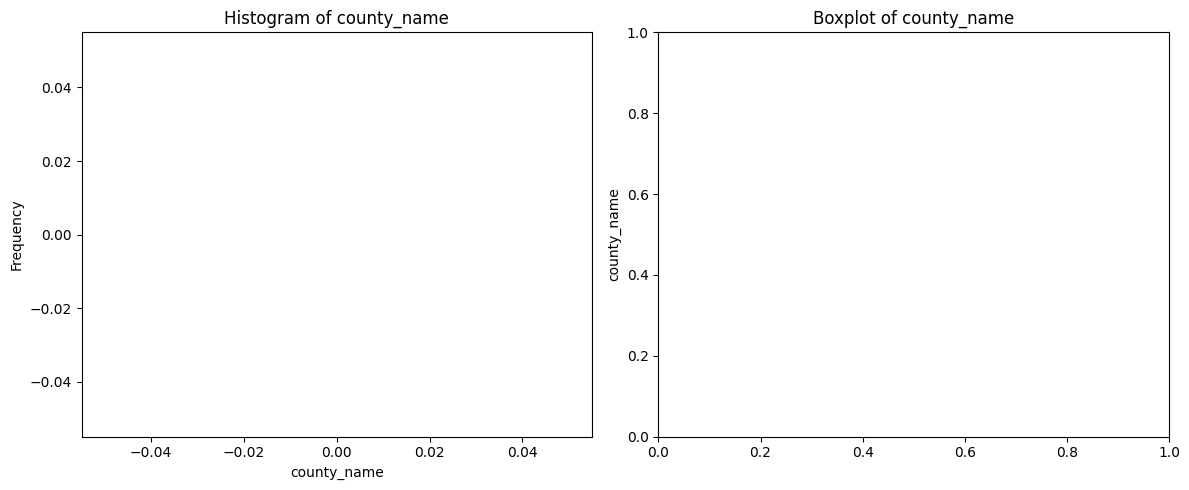

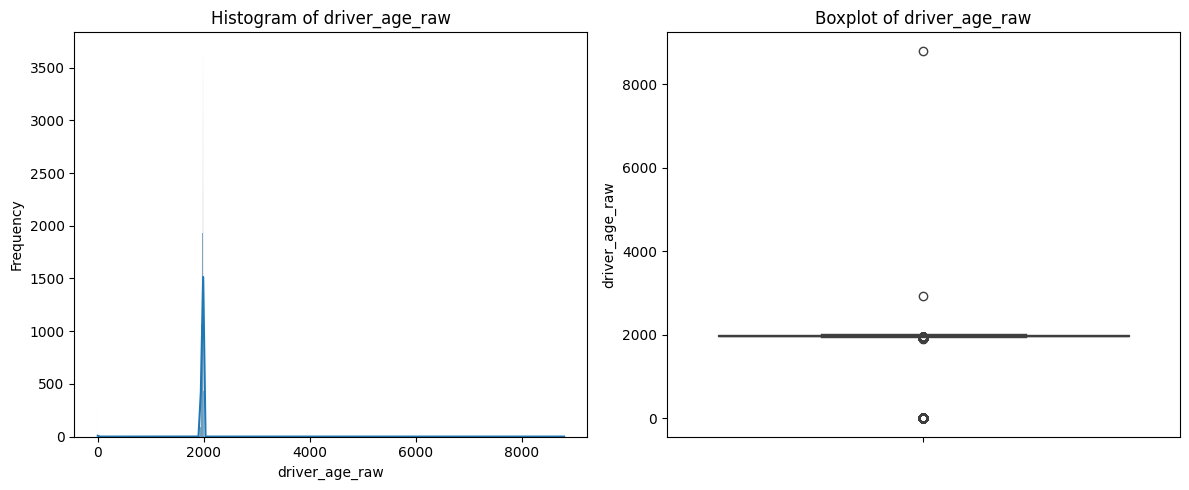

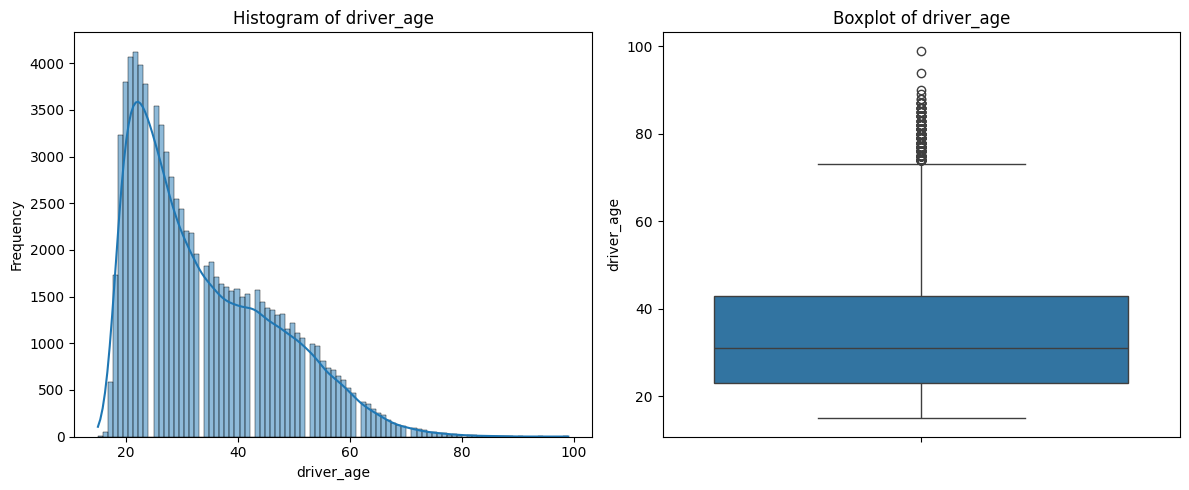

In [5]:
for feature in numeric_features_police:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(df_police[feature].dropna(), kde=True)  # Drop NaN for visualization
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_police[feature].dropna())  # Drop NaN for visualization
    plt.title(f'Boxplot of {feature}')
    plt.ylabel(feature)

    plt.tight_layout()
    plt.show()

In [6]:
numeric_df_police = df_police[numeric_features_police].dropna() # Drop rows with NaN in numeric cols

if not numeric_df_police.empty and len(numeric_df_police.columns) > 1:
    print("\nPairplot of numeric features:")
    sns.pairplot(numeric_df_police)
    plt.suptitle("Pairplot of Numeric Features", y=1.02)
    plt.show()

    print("\nCorrelation matrix of numeric features:")
    correlation_matrix_police = numeric_df_police.corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix_police, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix of Numeric Features')
    plt.show()
else:
    print("\nNot enough numeric features to generate pairplot and correlation matrix.")



Not enough numeric features to generate pairplot and correlation matrix.



Basic Feature-Level Inferences:

Driver Age:
The average driver age is approximately 34.01 years.
The distribution of driver ages (from the histogram) shows the frequency of different age groups.
The boxplot can help identify potential outliers in driver age.

Driver Race:
driver_race
White       71.935469
Black       14.169984
Hispanic    11.002453
Asian        2.614341
Other        0.277752
Name: proportion, dtype: float64


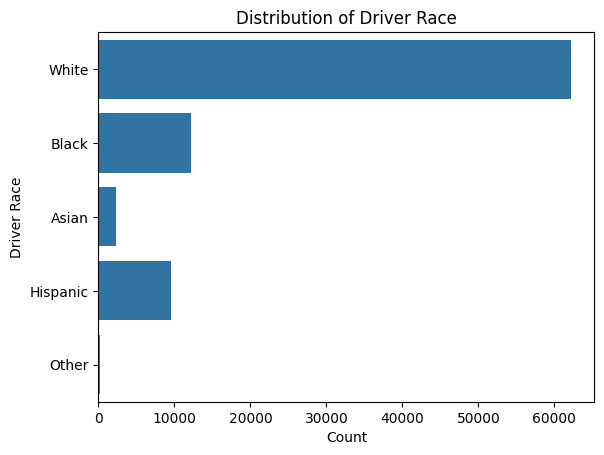

This shows the proportion and count of different driver races involved in police stops.

Violation:
violation
Speeding               48463
Moving violation       16224
Equipment              11020
Other                   4317
Registration/plates     3432
Seat belt               2952
Name: count, dtype: int64


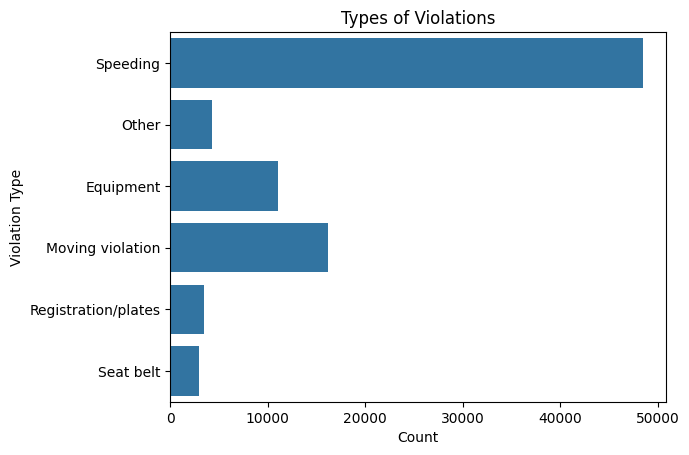

This indicates the frequency of different types of violations recorded.

Search Conducted:
search_conducted
False    96.51628
True      3.48372
Name: proportion, dtype: float64


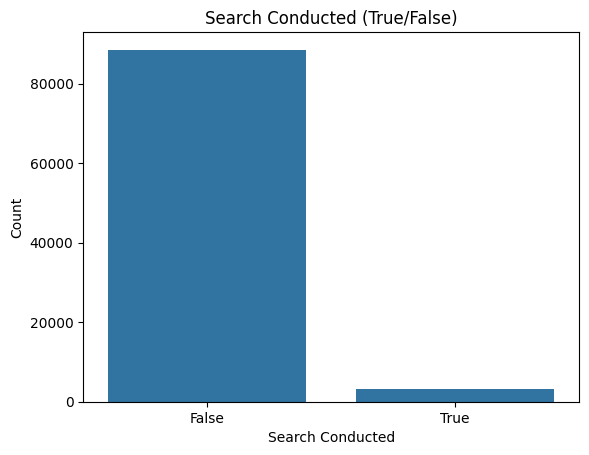

Approximately 3.48% of stops involved a search.

County Name:
The 'county_name' column is 100% null, as indicated in your description.


In [7]:
print("\nBasic Feature-Level Inferences:")

if 'driver_age' in df_police.columns:
    print("\nDriver Age:")
    print(f"The average driver age is approximately {df_police['driver_age'].mean():.2f} years.")
    print(f"The distribution of driver ages (from the histogram) shows the frequency of different age groups.")
    print("The boxplot can help identify potential outliers in driver age.")

if 'driver_race' in df_police.columns:
    print("\nDriver Race:")
    print(df_police['driver_race'].value_counts(normalize=True) * 100)
    sns.countplot(y='driver_race', data=df_police)
    plt.title('Distribution of Driver Race')
    plt.xlabel('Count')
    plt.ylabel('Driver Race')
    plt.show()
    print("This shows the proportion and count of different driver races involved in police stops.")

if 'violation' in df_police.columns:
    print("\nViolation:")
    print(df_police['violation'].value_counts())
    sns.countplot(y='violation', data=df_police)
    plt.title('Types of Violations')
    plt.xlabel('Count')
    plt.ylabel('Violation Type')
    plt.show()
    print("This indicates the frequency of different types of violations recorded.")

if 'search_conducted' in df_police.columns:
    print("\nSearch Conducted:")
    print(df_police['search_conducted'].value_counts(normalize=True) * 100)
    sns.countplot(x='search_conducted', data=df_police)
    plt.title('Search Conducted (True/False)')
    plt.xlabel('Search Conducted')
    plt.ylabel('Count')
    plt.show()
    print(f"Approximately {df_police['search_conducted'].mean() * 100:.2f}% of stops involved a search.")

# Note on 'county_name':
if 'county_name' in df_police.columns:
    if df_police['county_name'].isnull().all():
        print("\nCounty Name:")
        print("The 'county_name' column is 100% null, as indicated in your description.")

In [8]:
print("\nFurther Exploration for Police Stop Dataset:")
print("- Analyze the temporal aspects using 'stop_date' and 'stop_time'.")
print("- Investigate potential relationships between 'driver_race', 'violation', and 'search_conducted'.")
print("- Explore the distribution of 'driver_gender'.")
print("- Consider the relationship between 'driver_age' and the type of 'violation'.")
print("- Handle any missing values in other relevant columns if needed.")


Further Exploration for Police Stop Dataset:
- Analyze the temporal aspects using 'stop_date' and 'stop_time'.
- Investigate potential relationships between 'driver_race', 'violation', and 'search_conducted'.
- Explore the distribution of 'driver_gender'.
- Consider the relationship between 'driver_age' and the type of 'violation'.
- Handle any missing values in other relevant columns if needed.
